## Implement ROC curve and AUC calculation from scratch.

In [26]:
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
import numpy as np

In [27]:
X, y = make_classification(
    n_samples=1000,
    n_classes=2,
    n_features=5,
    weights=[0.5, 0.5],
    random_state=42
)
rcf = RandomForestClassifier(random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)
rcf.fit(X_train, y_train)
y_pred_proba = rcf.predict_proba(X_val)[:,1]

In [28]:
thresholds = np.unique([0.] + list(y_pred_proba.flatten()) + [1.])[::-1]
tpr = [0]
fpr = [0]
auc_score = 0
for threshold in thresholds:
    y_pred = (y_pred_proba >= threshold).astype(int)
    t = (y_pred == y_val)
    p = (y_pred == 1)  
    n = ~p
    f = ~t  
    tp = (t & p).sum()
    tn = (t & n).sum()
    fp = (f & p).sum()
    fn = (f & n).sum()
    if tp + fn > 0 and fp + fn > 0:        
        tpr_val = tp / (tp + fn)
        fpr_val = fp / (fp + tn)        
        width = fpr_val - fpr[-1]
        height = (tpr_val + tpr[-1]) / 2
        auc_score += width * height
        tpr.append(tpr_val)
        fpr.append(fpr_val)

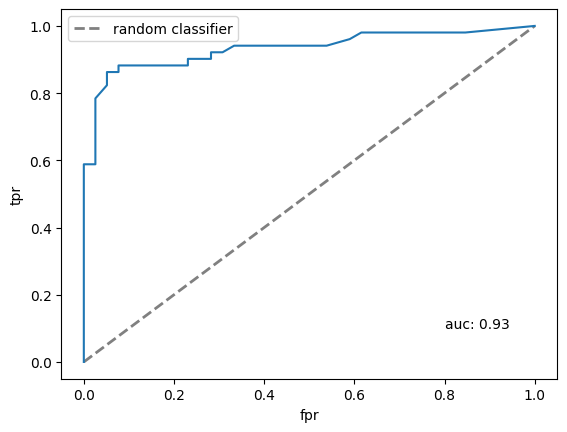

In [29]:
plt.plot([0, 1], [0, 1], color='grey', linestyle='--', lw=2, label='random classifier')
plt.plot(fpr, tpr)
plt.text(s=f"auc: {round(auc_score, 2)}", x=0.8, y=0.1)
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.legend()
plt.show()

### Compare with sklearn implementation

In [30]:
from sklearn.metrics import roc_curve, auc

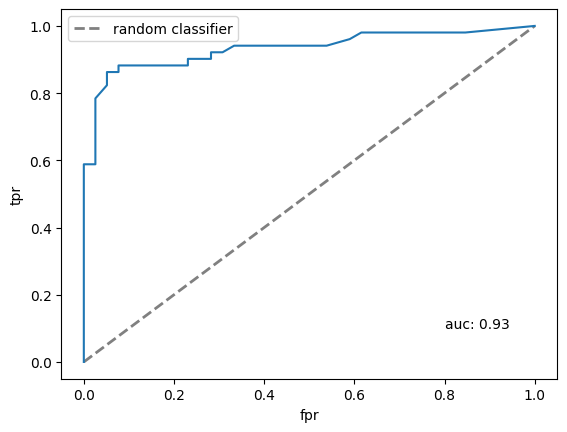

In [31]:
fpr, tpr, thresholds = roc_curve(y_val, y_pred_proba)
auc_score = auc(fpr, tpr)

plt.plot([0, 1], [0, 1], color='grey', linestyle='--', lw=2, label='random classifier')
plt.plot(fpr, tpr)
plt.text(s=f"auc: {round(auc_score, 2)}", x=0.8, y=0.1)
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.legend()
plt.show()

### Almost exatcly

## Plot the PR curve and compute Average Precision.

In [46]:
X, y = make_classification(
    n_samples=1000,
    n_classes=2,
    n_features=5,
    weights=[0.95, 0.05],
    random_state=42
)
rcf = RandomForestClassifier(class_weight={0: 0.95, 1: 0.05}, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42, stratify=y_train)
rcf.fit(X_train, y_train)
y_pred_proba = rcf.predict_proba(X_val)[:,1]

In [47]:
thresholds = np.unique([0] + list(y_pred_proba) + [1])[::-1]
precisions = [1]
recalls = [0]
average_precision = 0
for threshold in thresholds:
    y_pred = (y_pred_proba >= threshold).astype(int)        
    t = (y_pred == y_val)
    p = (y_pred == 1)  
    n = ~p
    f = ~t  
    tp = (t & p).sum()
    tn = (t & n).sum()
    fp = (f & p).sum()
    fn = (f & n).sum()

    
    recall_score = 0
    precision_score = 0    
    if tp + fn > 0 and tp + fp > 0:
        recall_score = tp / (tp + fn)                
        precision_score = tp / (tp + fp)

    elif tp + fn > 0:
        precision_score = 1
                    
    width = recall_score - recalls[-1]
    height = (precision_score + precisions[-1]) / 2
    average_precision += width * height
    precisions.append(precision_score)
    recalls.append(recall_score)       
print(recalls, '\n', precisions)    

[0, 0, 0.2, 0.4, 0.6, 0.6, 0.6, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 1.0] 
 [1, 1, 1.0, 1.0, 1.0, 0.75, 0.6, 0.6666666666666666, 0.5714285714285714, 0.5, 0.4444444444444444, 0.4, 0.36363636363636365, 0.3333333333333333, 0.3076923076923077, 0.26666666666666666, 0.25, 0.2222222222222222, 0.18181818181818182, 0.14285714285714285, 0.10526315789473684, 0.05555555555555555]


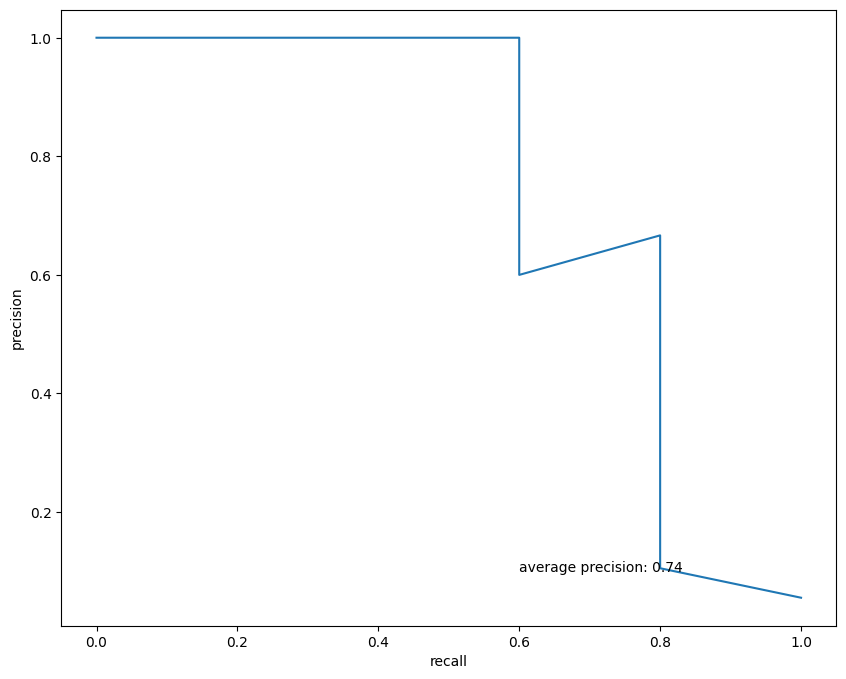

In [48]:
plt.figure(figsize=(10, 8))
plt.plot(recalls, precisions)
plt.xlabel('recall')
plt.ylabel('precision')
plt.text(s=f"average precision: {round(average_precision, 2)}", x=0.6, y=0.1)
plt.show()

In [51]:
from sklearn.metrics import precision_recall_curve, average_precision_score
precisions, recalls, thresholds = precision_recall_curve(y_val, y_pred_proba)
average_precision = average_precision_score(y_val, y_pred_proba)

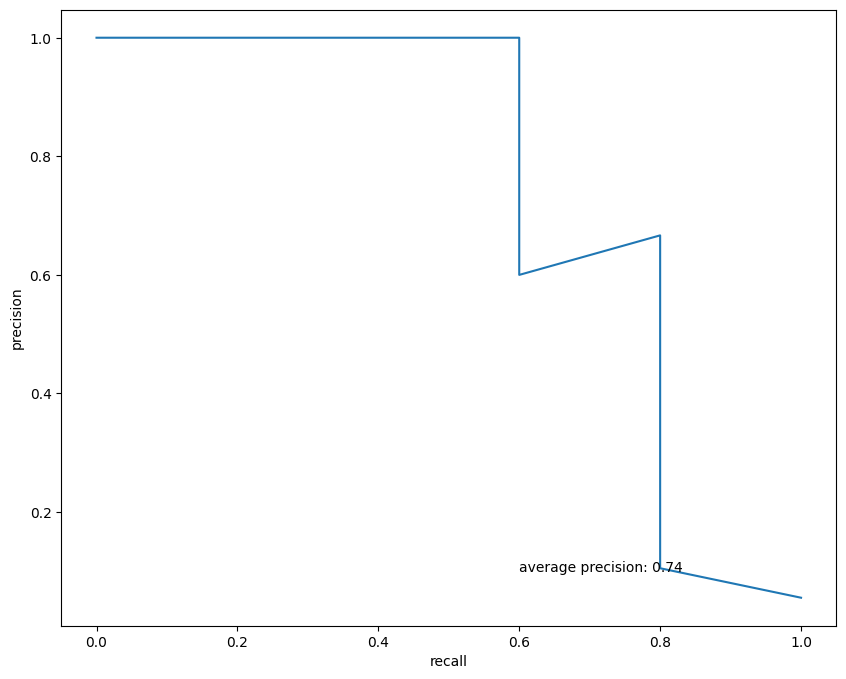

In [52]:
plt.figure(figsize=(10, 8))
plt.plot(recalls, precisions)
plt.xlabel('recall')
plt.ylabel('precision')
plt.text(s=f"average precision: {round(average_precision, 2)}", x=0.6, y=0.1)
plt.show()